Testing learning rate: 1
Did not converge
Testing learning rate: 0.5
Did not converge
Testing learning rate: 0.25
Did not converge
Testing learning rate: 0.125
Did not converge
Testing learning rate: 0.0625
Did not converge
Testing learning rate: 0.03125
Did not converge
Best learning rate: 0.5
Learned weight vector: [-0.02230249  0.55337564  0.42848522  0.46443989  1.02162173  0.07186647
  1.10587611  0.64437312]


C:\Users\raoge\AppData\Local\Temp\ipykernel_23944\639924458.py:21: RuntimeWarning: overflow encountered in square
  cost = np.sum((X.dot(w_new) - y)**2) / (2*m)  # Cost after updating weights


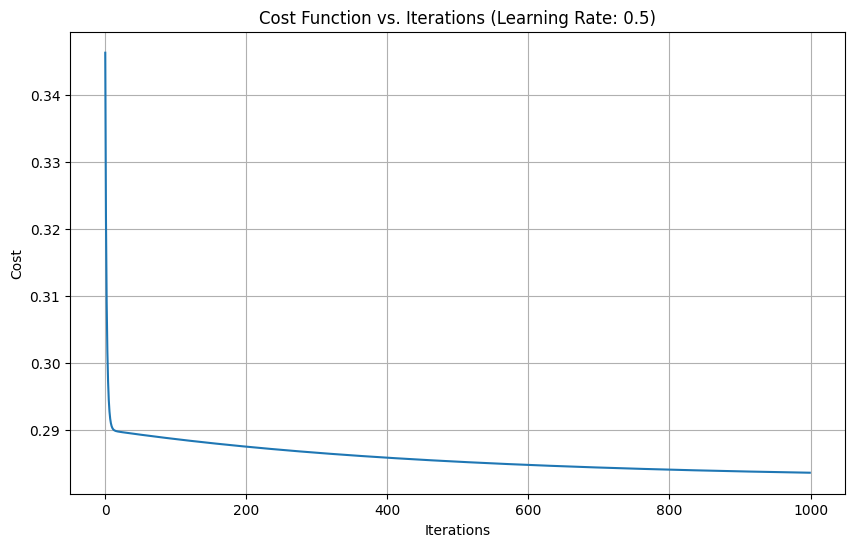

Cost function value on test data: 0.4597912157366825


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def load_data(filename):
    data = np.loadtxt(filename, delimiter=',')
    X = data[:, :-1]
    y = data[:, -1]
    X = np.hstack((np.ones((X.shape[0], 1)), X))  # Add bias term
    return X, y

def batch_gradient_descent(X, y, learning_rate, max_iterations=1000, tolerance=1e-6):
    m, n = X.shape
    w = np.zeros(n)
    costs = []
    
    for i in range(max_iterations):
        h = X.dot(w)
        gradient = X.T.dot(h - y) / m
        w_new = w - learning_rate * gradient
        
        cost = np.sum((X.dot(w_new) - y)**2) / (2*m)  # Cost after updating weights
        costs.append(cost)
        
        if np.linalg.norm(gradient) < tolerance:  # Convergence based on gradient
            print(f"Converged after {i+1} iterations")
            return w_new, costs
        
        w = w_new
    
    print("Did not converge")
    return w, costs

def calculate_cost(X, y, w):
    m = X.shape[0]
    h = X.dot(w)
    return np.sum((h - y)**2) / (2*m)

# Load data
X_train, y_train = load_data('train.csv')
X_test, y_test = load_data('test.csv')

# Tune learning rate
learning_rates = [1, 0.5, 0.25, 0.125, 0.0625, 0.03125]
best_lr = None
best_w = None
best_costs = None

for lr in learning_rates:
    print(f"Testing learning rate: {lr}")
    w, costs = batch_gradient_descent(X_train, y_train, lr)
    
    if best_costs is None or costs[-1] < best_costs[-1]:  # Compare final cost
        best_lr = lr
        best_w = w
        best_costs = costs

print(f"Best learning rate: {best_lr}")
print(f"Learned weight vector: {best_w}")

# Plot cost function
plt.figure(figsize=(10, 6))
plt.plot(range(len(best_costs)), best_costs)
plt.title(f'Cost Function vs. Iterations (Learning Rate: {best_lr})')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

# Calculate cost for test data
test_cost = calculate_cost(X_test, y_test, best_w)
print(f"Cost function value on test data: {test_cost}")
